In [1]:
import numpy as np
import warnings
import sys
import pandas as pd
import scipy
from scipy.io import arff
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [4]:
data, meta = scipy.io.arff.loadarff('mtr-datasets/andro.arff')
data = pd.DataFrame(data)
data.head()

,Window0-Att0,Window0-Att1,Window0-Att2,Window0-Att3,Window0-Att4,Window0-Att5,Window1-Att0,Window1-Att1,Window1-Att2,Window1-Att3,...,Window4-Att2,Window4-Att3,Window4-Att4,Window4-Att5,Target,Target_2,Target_3,Target_4,Target_5,Target_6
0,11.84,5.08,49.0,32.2,16.5,1.40,12.01,5.09,48.0,32.0,...,45.0,29.7,38.5,3.27,15.17,5.14,46.0,30.4,46.8,3.74
1,12.01,5.09,48.0,32.0,14.8,1.25,12.89,5.10,48.0,31.9,...,46.0,30.1,42.6,3.55,14.85,5.11,47.0,31.2,46.8,3.78
2,12.89,5.10,48.0,31.9,8.6,0.71,13.95,5.11,47.0,30.8,...,48.0,31.3,46.0,3.79,14.72,5.10,48.0,31.7,42.7,3.40
3,13.95,5.11,47.0,30.8,20.2,1.64,13.75,5.13,45.0,29.7,...,47.0,31.1,46.7,3.79,15.28,5.11,48.0,32.0,42.5,3.38
4,13.75,5.13,45.0,29.7,38.5,3.27,13.34,5.13,46.0,30.1,...,45.0,29.7,45.1,3.75,16.15,5.13,47.0,30.8,42.1,3.27


In [5]:
target = data.iloc[:,-6:]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = target.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(target.values, i) 
                          for i in range(len(target.columns))] 
  
print(vif_data)

    feature           VIF
0    Target    392.440531
1  Target_2    655.776805
2  Target_3  32954.583329
3  Target_4  29269.324634
4  Target_5   2178.244076
5  Target_6   2243.596734


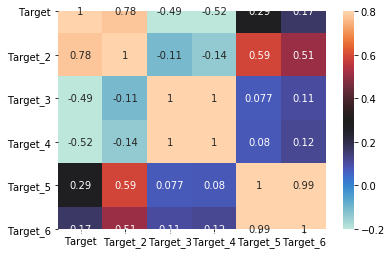

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = target.corr()

sns.heatmap(corr, annot = True,vmin=-0.2,vmax=0.8,center=0.3)